<br><font face = "Times New Roman" size = "4"> <b>Name: Sankul Pandey  DS0722
<br><font face = "Times New Roman" size = "4"> <b>Email: sankul99@gmail.com
    
    
    
    
    


<br><font face = "Muller Text" size = "8"> <b> Customer Churn Analysis 
    
    
    
    

<br><font face = "TImes New Roman" size = "5"> <b> Problem Statement


<br><font face = "TImes New Roman" size = "4"> <b> Description

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products, But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. 

Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.Preventing customer churn is critically important to the telecommunications sector, as the 
barriers to entry for switching services are so low. You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.


<br><font face = "TImes New Roman" size = "4"> <b> Dataset Link - https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

# 1) Necessary Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time

import warnings
warnings.filterwarnings('ignore')

# 2) Importing Data 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3) Checking Columns, Data Types and Shape 

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

From above it is clear that the data set has 3 types of datatypes 

1. float64
2. object 
3. int64

In [6]:
df.shape

(7043, 21)

# 4) Checking For Empty Spaces and Null Values 

In [7]:

for x in df.columns:
    print(df.loc[df[x]==" "])

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0

<AxesSubplot:>

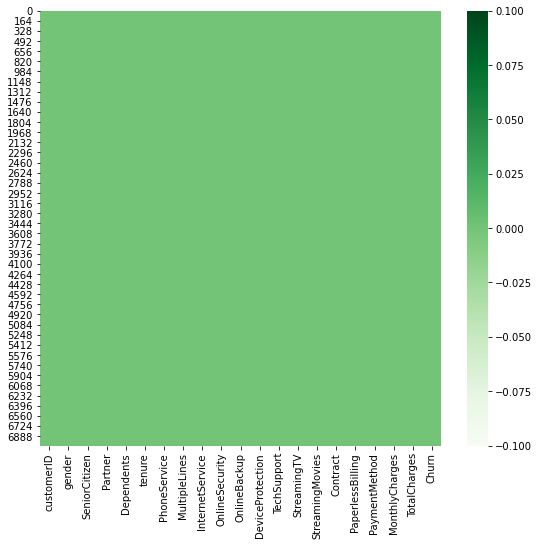

In [8]:
plt.figure(figsize=(9,8))
sns.heatmap(df.isnull(),cmap='Greens')

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
#Checking for duplicates

dupli = df[df.duplicated()]
print("All the Duplicate Rows are: ")

dupli

All the Duplicate Rows are: 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
dff= df.drop('customerID',axis=1)

### After performing further analysis on the data we have concluded the following observations, 

1. The dataset has 21 unique columns 
2. dataset has 3 different types of data types
3. shape of the dataset is 7043,21
4. heatmap tells us that data has no null values 
5. It is further confirmed by using 'isnull'
6. Data set also has no duplicate columns as stated earlier all the columns are uniques. 
7. We will also drop the customerId column because it is not important in our analysis 

In [13]:
dff.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [14]:
dff.shape

(7043, 20)


<br><font face = "TImes New Roman" size = "3"> <b> We can clearly see that the data needs no further adjustmenets such as removing duplicates and etc. So we will directly start with Visual analysis of the data.

# 5) Visual Analysis Of The Data 


<br><font face = "TImes New Roman" size = "3"> <b> Visual analysis are of three types. Univariate,Bivariate and Multivariate  

<br><font face = "Arial" size = "2"> 

1. In Univariate analysis of the data we will do visual analysis of all the columns individually 
    
    
    
2. In Bivariate analysis of the data we will select and perform visual analysis on two relevant columns at that point in time of our analysis 
    
    
    
3. In Multivariate analysis of the data we will select multiple columns, the columns that are most relevant to us and do cross visualisation on these columns 
    


## Univariate Analysis 

In [15]:
#We will be needing it for this analysis 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

### 1. Gender

In [16]:
dff['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [17]:
le.fit(dff['gender'])
label_gender=dict(zip(range(len(le.classes_)),le.classes_))

In [18]:
dff['gender']=le.fit_transform(dff['gender']) #Because data is object type

<AxesSubplot:xlabel='gender', ylabel='count'>

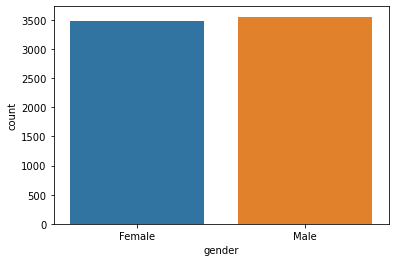

In [19]:
sns.countplot(df['gender'])

Both female and male are equal in numbers 

### 2. SeniorCitizen

In [20]:
dff['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

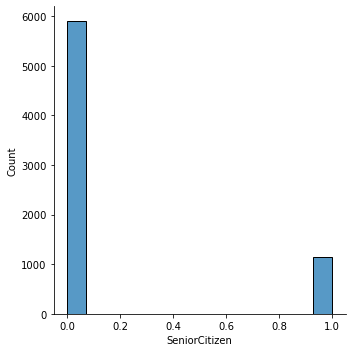

In [21]:
sns.displot(dff['SeniorCitizen'])

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

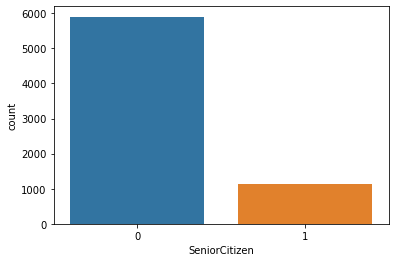

In [22]:
sns.countplot(dff['SeniorCitizen'])

The amount of senior citizens compared to the total population are less.

### 3. Partner

In [23]:
dff['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [24]:
le.fit(dff['Partner'])
label_partner=dict(zip(range(len(le.classes_)),le.classes_)) 

In [25]:
dff['Partner']=le.fit_transform(dff['Partner'])

<AxesSubplot:xlabel='Partner', ylabel='count'>

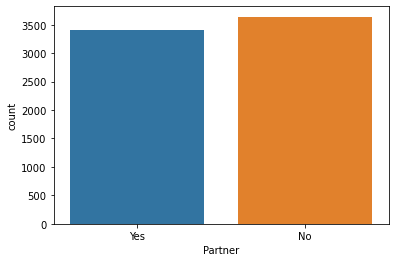

In [26]:
sns.countplot(df['Partner'])

The Yes and No values of both the category in this particular dataset is almost the same 

### 4. Dependents

In [27]:
dff['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [28]:
le.fit(dff['Dependents'])
label_dependents=dict(zip(range(len(le.classes_)),le.classes_)) 

In [29]:
dff['Dependents']=le.fit_transform(dff['Dependents'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

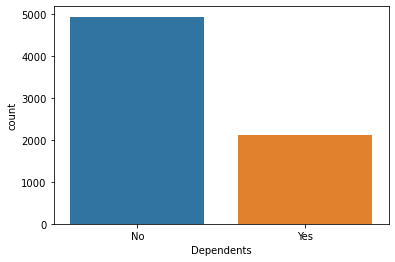

In [30]:
sns.countplot(df['Dependents'])

The amount of "No dependents" is higher compared to the others.

### 5. Tenure

In [31]:
dff['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='count'>

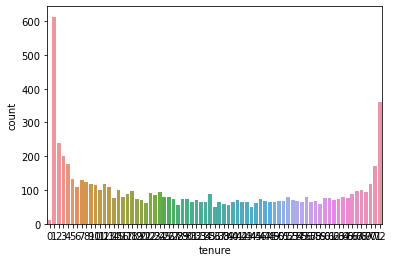

In [32]:
sns.countplot(dff['tenure'])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

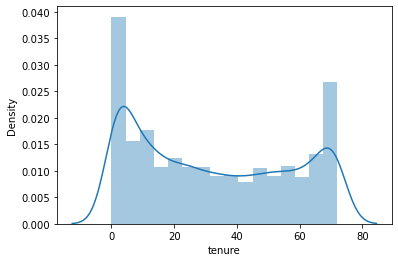

In [33]:
sns.distplot(dff['tenure'])

<AxesSubplot:>

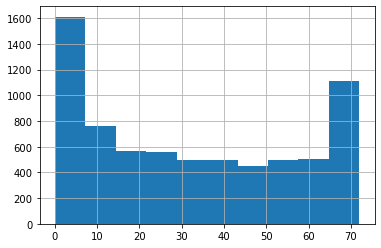

In [34]:
dff['tenure'].hist()

Highest frequency reaches between 0 and 10 and reaches upto a high of 1600, second highest comes around 65 to 70 and the value is between 1000 to 1200

### 6. PhoneService

In [35]:
dff['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [36]:
le.fit(dff['PhoneService'])
label_phoneservice=dict(zip(range(len(le.classes_)),le.classes_)) 

In [37]:
dff['PhoneService']=le.fit_transform(dff['PhoneService'])

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

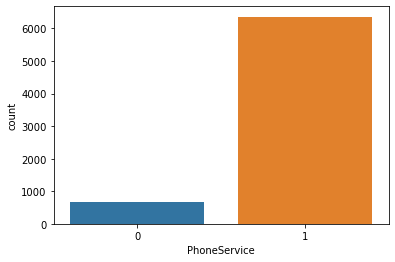

In [38]:
sns.countplot(dff['PhoneService'])

### 7. MultipleLines

In [39]:
dff['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [40]:
le.fit(dff['MultipleLines'])
label_multiplelines=dict(zip(range(len(le.classes_)),le.classes_)) 

In [41]:
dff['MultipleLines']=le.fit_transform(dff['MultipleLines'])

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

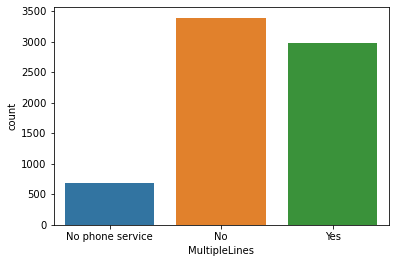

In [42]:
sns.countplot(df['MultipleLines'])

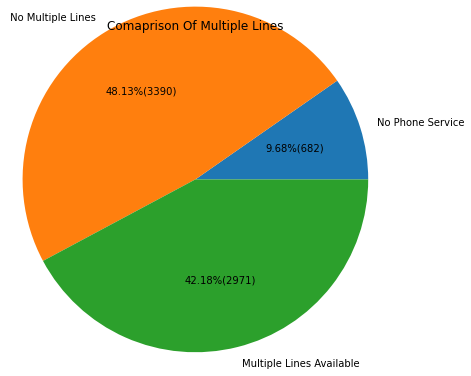

In [43]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['No Phone Service',' No Multiple Lines','Multiple Lines Available']
value=[682,3390,2971]
ax.pie(value,labels=langs,radius=1.5,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison Of Multiple Lines')
plt.show()

Highest is no multiple lines 

1. 48.13% has no multiple lines.
2. 42.18% have multiple lines available
3. 9.68% don't even have phone service 

### 8. InternetService

In [44]:
Is= dff['InternetService'].value_counts()

In [196]:
le.fit(dff['InternetService'])
label_internetservice=dict(zip(range(len(le.classes_)),le.classes_)) 

In [197]:
dff['InternetService']=le.fit_transform(dff['InternetService'])

<AxesSubplot:xlabel='InternetService', ylabel='count'>

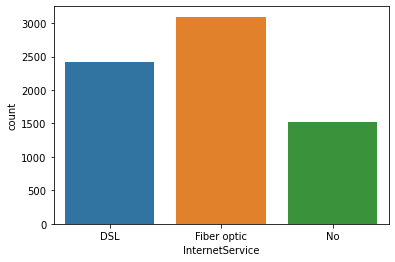

In [47]:
sns.countplot(df['InternetService'])

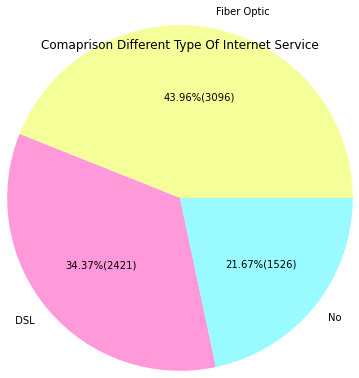

In [48]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Fiber Optic',' DSL','No']
value= Is
colors = ['#f5ff99','#ff99da','#99faff']
ax.pie(value,labels=langs,colors=colors,radius=1.5,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison Different Type Of Internet Service')
plt.show()

Most number of internet connection is through fiber optics

1. 43.96% of internet connection is because of fiber optic 
2. 34.37% of internet connection is because of DSL
3. 21.67% of the population don't even have internet connection 

In [195]:
df2.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int64
InternetService      object
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int64
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

### 9. OnlineSecurity

In [49]:
dff['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [50]:
le.fit(dff['OnlineSecurity'])
label_onlinesecurity=dict(zip(range(len(le.classes_)),le.classes_)) 

In [51]:
dff['OnlineSecurity']=le.fit_transform(dff['OnlineSecurity'])

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

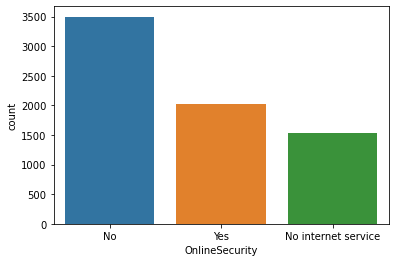

In [52]:
sns.countplot(df['OnlineSecurity'])

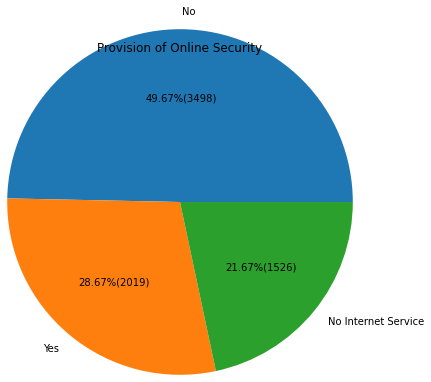

In [53]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['No','Yes','No Internet Service']
value=[3498,2019,1526]
ax.pie(value,labels=langs,radius=1.5,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Provision of Online Security')
plt.show()

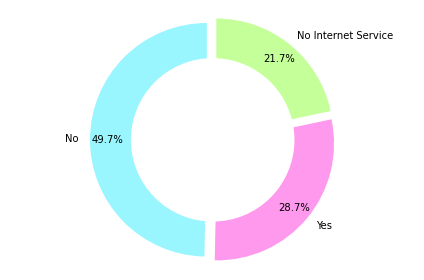

In [54]:
labels = ['No', 'Yes', 'No Internet Service']
sizes = [3498, 2019, 1526]
colors = ['#99f6ff','#ff99ee','#c4ff99']
explode = (0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()
plt.show()

1. 49.7% Have no provision to online security
2. 28.7% Have online security 
21.7% don;t even have internet connection 

### 10. OnlineBackup 

In [55]:
dff['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [56]:
le.fit(dff['OnlineBackup'])
label_onlinebackup=dict(zip(range(len(le.classes_)),le.classes_)) 

In [57]:
dff['OnlineBackup']=le.fit_transform(dff['OnlineBackup'])

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

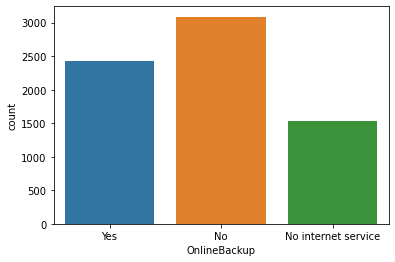

In [58]:
sns.countplot(df['OnlineBackup'])

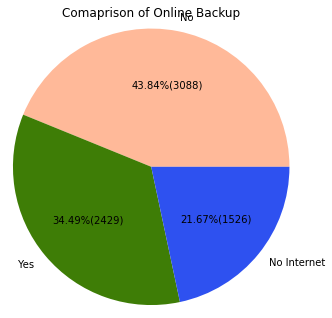

In [59]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['No',' Yes','No Internet']
value=dff['OnlineBackup'].value_counts()
colors = ['#ffb999','#3e7d06','#2e51f0']
ax.pie(value,labels=langs,colors=colors,radius=1.2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison of Online Backup')
plt.show()

1. 43.84% have no online backup 
2. 34.49% have online backup 
3. 21.67% don't even have internet connection 

### 11. DeviceProtection

In [60]:
dff['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [61]:
le.fit(dff['DeviceProtection'])
label_deviceprotection=dict(zip(range(len(le.classes_)),le.classes_)) 

In [62]:
dff['DeviceProtection']=le.fit_transform(dff['DeviceProtection'])

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

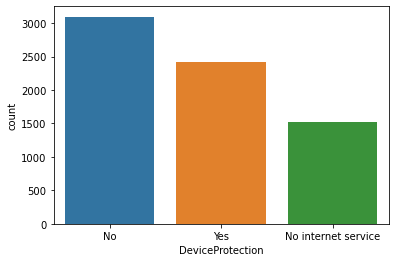

In [63]:
sns.countplot(df['DeviceProtection'])

Maximum amount of people don't have device protection

### 12. TechSupport

In [64]:
dff['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [65]:
le.fit(dff['TechSupport'])
label_techsupport=dict(zip(range(len(le.classes_)),le.classes_)) 

In [66]:
dff['TechSupport']=le.fit_transform(dff['TechSupport'])

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

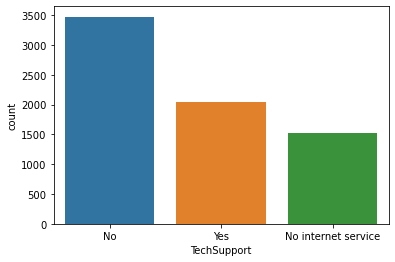

In [67]:
sns.countplot(df['TechSupport'])

maxium amount of people don't have facilities to tech support 

### 13. StreamingTV

In [68]:
dff['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [69]:
le.fit(dff['StreamingTV'])
label_streaming=dict(zip(range(len(le.classes_)),le.classes_)) 

In [70]:
dff['StreamingTV']=le.fit_transform(dff['StreamingTV'])

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

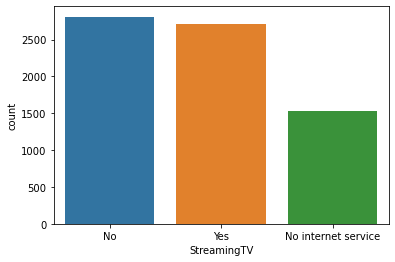

In [71]:
sns.countplot(df['StreamingTV'])

The amount of people that have and don't have a streaming TV is almost the same.
People who don't have streaming tv is slightly more 

### 14. StreamingMovies

In [72]:
dff['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [73]:
le.fit(dff['StreamingMovies'])
label_streamingmov=dict(zip(range(len(le.classes_)),le.classes_)) 

In [74]:
dff['StreamingMovies']=le.fit_transform(dff['StreamingMovies'])

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

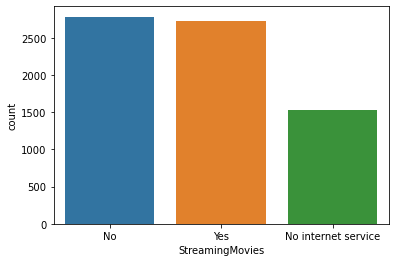

In [75]:
sns.countplot(df['StreamingMovies'])

We can observe from the above countplot that People who stream movies is almost the same 

### 15. Contract

In [76]:
dff['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [77]:
le.fit(dff['Contract'])
label_contract=dict(zip(range(len(le.classes_)),le.classes_)) 

In [78]:
dff['Contract']=le.fit_transform(dff['Contract'])

<AxesSubplot:xlabel='Contract', ylabel='count'>

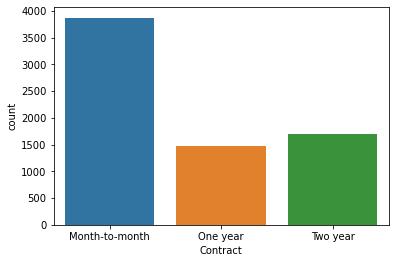

In [79]:
sns.countplot(df['Contract'])

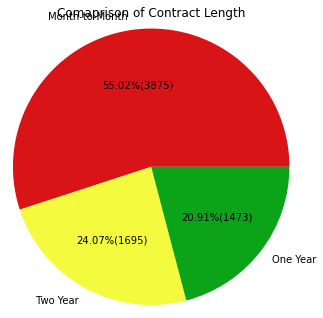

In [80]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Month-to-Month',' Two Year','One Year']
value=dff['Contract'].value_counts()
colors = ['#d91417','#f4fa3e','#0ba318']
ax.pie(value,labels=langs,colors=colors,radius=1.2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison of Contract Length')
plt.show()

1. We can see from the above diagram that maximum amount of people have contract on month to month basis 
2. 24.07% have contract for 2 years
3. 20.9% have contract for 1 years

### 16. PaperlessBilling

In [81]:
dff['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [82]:
le.fit(dff['PaperlessBilling'])
label_paperless=dict(zip(range(len(le.classes_)),le.classes_)) 

In [83]:
dff['PaperlessBilling']=le.fit_transform(dff['PaperlessBilling'])

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

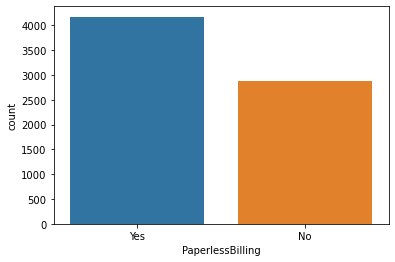

In [84]:
sns.countplot(df['PaperlessBilling'])

More amount of people prefer and have paper less billing

### 17. PaymentMethod

In [85]:
dff['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [86]:
le.fit(dff['PaymentMethod'])
label_payment=dict(zip(range(len(le.classes_)),le.classes_)) 

In [87]:
dff['PaymentMethod']=le.fit_transform(dff['PaymentMethod'])

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

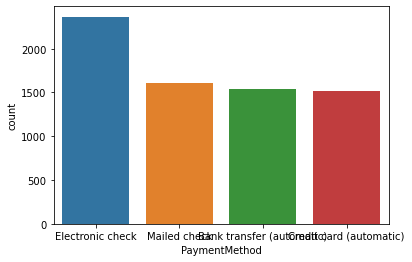

In [88]:
sns.countplot(df['PaymentMethod'])

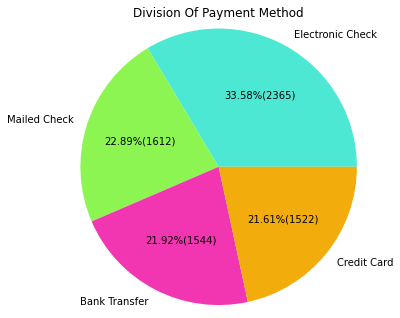

In [89]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Electronic Check','Mailed Check','Bank Transfer','Credit Card']
value=dff['PaymentMethod'].value_counts()
colors = ['#4de8d3','#8df551','#f235b0','#f2ad0c']
ax.pie(value,labels=langs,colors=colors,radius=1.2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Division Of Payment Method')
plt.show()

We can observe from the above pie chart that

1. 33.58% prefer Electronic Check 
2. 22.89% prefer Mailed Check
3. 21.92% prefer Bank Transfer 
4. 21.61% prefer Credit Cards 

### 18. Monthly Charges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

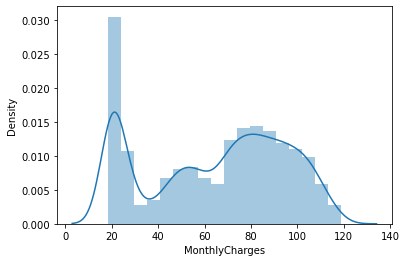

In [90]:
sns.distplot(df['MonthlyCharges'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='count'>

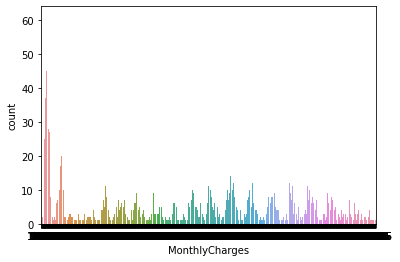

In [91]:
sns.countplot(dff['MonthlyCharges'])

<AxesSubplot:>

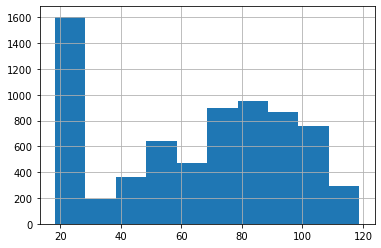

In [92]:
dff['MonthlyCharges'].hist()

1. Most Charges are there between the range 20 to 30
2. Then the charges stay consistent between 70 to 110

### 19. TotalCharges

The value of total charges are not valid. We would have input new values here to help our analysis

In [93]:
dfco=dff
dfco.TotalCharges=None
dfco.TotalCharges = dfco.tenure * dfco.MonthlyCharges

In [94]:
dfco.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,1,0,1,1,24,1,2,DSL,2,0,2,2,2,2,1,1,3,84.80,2035.2,No
7039,0,0,1,1,72,1,2,Fiber optic,0,2,2,0,2,2,1,1,1,103.20,7430.4,No
7040,0,0,1,1,11,0,1,DSL,2,0,0,0,0,0,0,1,2,29.60,325.6,No
7041,1,1,1,0,4,1,2,Fiber optic,0,0,0,0,0,0,0,1,3,74.40,297.6,Yes
7042,1,0,0,0,66,1,0,Fiber optic,2,0,2,2,2,2,2,1,0,105.65,6972.9,No


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

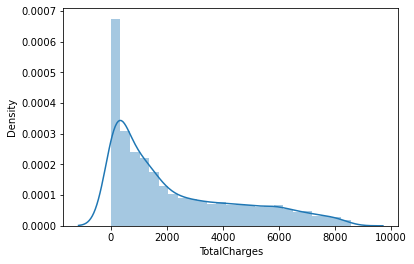

In [95]:
sns.distplot(dfco['TotalCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='count'>

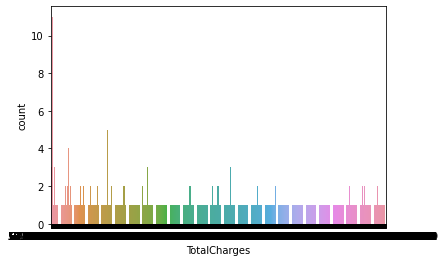

In [96]:
sns.countplot(dfco['TotalCharges'])

<AxesSubplot:>

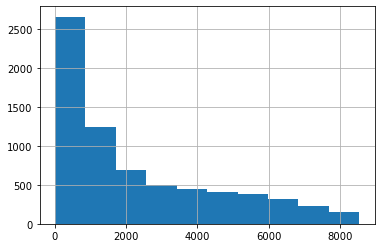

In [97]:
dfco['TotalCharges'].hist()

Maximum customers are present when the charges are low, as soon as the cahrges increases the amount of customers we have decreases 

### 20. Churn

In [98]:
dfco['PaymentMethod'].value_counts()

2    2365
3    1612
0    1544
1    1522
Name: PaymentMethod, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

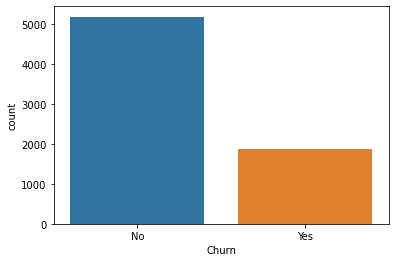

In [99]:
sns.countplot(dfco['Churn'])

In [100]:
le.fit(dfco['PaymentMethod'])
label_churn=dict(zip(range(len(le.classes_)),le.classes_)) 

In [101]:
dfco['PaperlessBilling']=le.fit_transform(dfco['PaperlessBilling'])

In [102]:
le.fit(dfco['Churn'])
label_Churn=dict(zip(range(len(le.classes_)),le.classes_))
time.sleep(5)
dfco['Churn']=le.fit_transform(dfco['Churn'])

In [103]:
df2 = dfco

In [104]:
df2.shape

(7043, 20)

In [194]:
df2.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int64
InternetService      object
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int64
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

## Multivariate Analysis And Correlation


<br><font face = "Muller Text" size = "3"> <b> We will first perform Multivariate analysis so we can figure out which columns are correlated to each other so that we can do further visual analysis on selective columns 

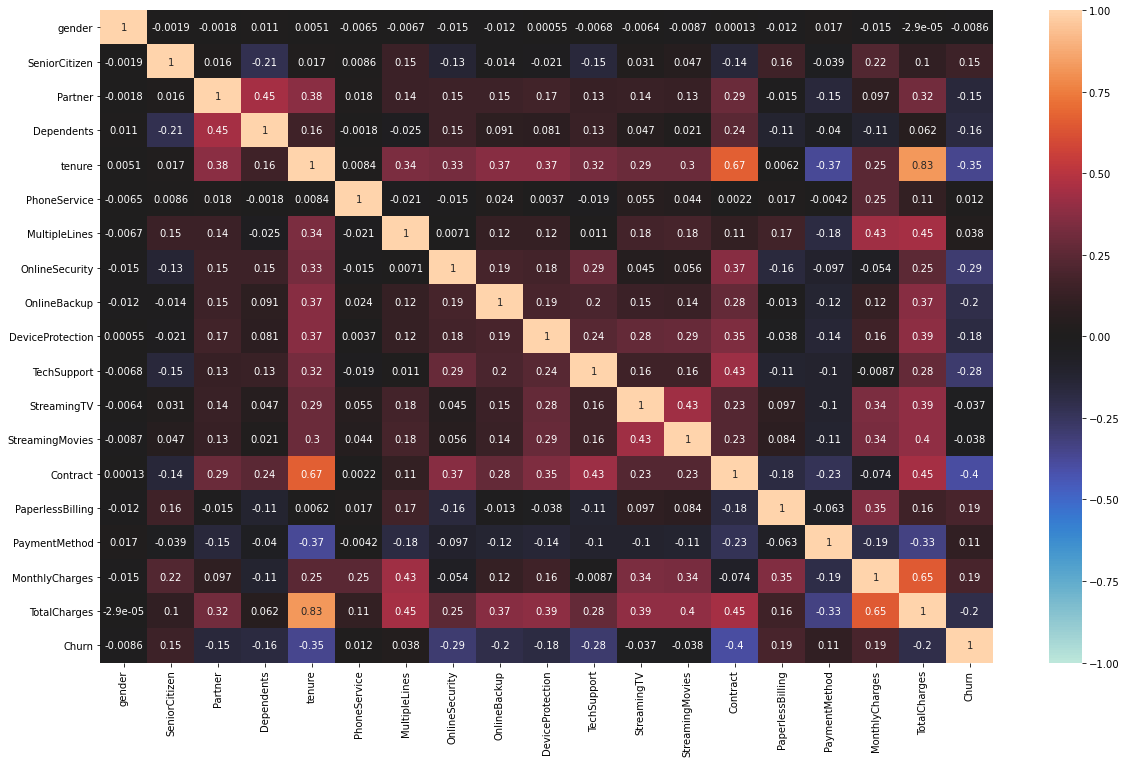

In [105]:
plt.figure(figsize=(20,12))
sns.heatmap(df2.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

We can see from the above how multiple variables are correlated to each other 

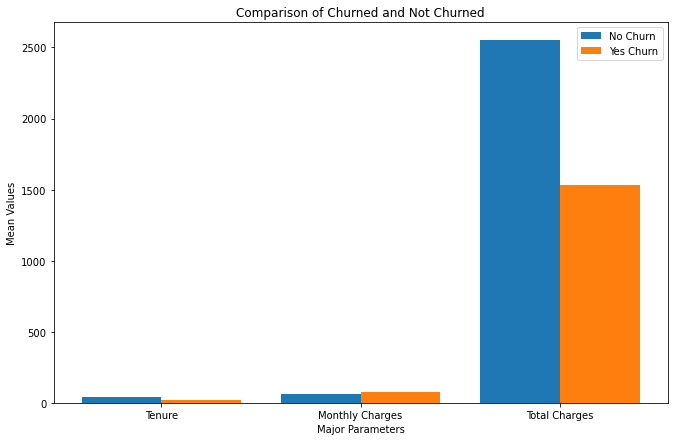

In [106]:
X =['Tenure','Monthly Charges','Total Charges']
yp = [37.569965,61.265124,2549.770883]
yq = [17.979133,74.441332,1531.608828]
plt.figure(figsize=(11,7))  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, yp, 0.4, label = 'No Churn')
plt.bar(X_axis + 0.2, yq, 0.4, label = 'Yes Churn')
  
plt.xticks(X_axis, X)
plt.xlabel("Major Parameters")
plt.ylabel("Mean Values")
plt.title("Comparison of Churned and Not Churned")
plt.legend()
plt.show()

1. People going to churn have low average tenure compared to other categories
2. People going to churn have higher monthly charges
3. People who churn therefore also have low total charges

### Grouping the Churn to understand more about customer behaviour 

In [107]:
churn=df2.groupby('Churn')
churn_0=churn.get_group(0)
churn_1=churn.get_group(1)

In [108]:
churn_0.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.0
mean,0.507344,0.128721,0.528218,0.344801,37.569965,0.901044,0.918825,0.939505,1.009857,0.998647,0.943371,1.004832,1.012949,0.889254,0.535562,1.505605,61.265124,2549.770883,0.0
std,0.499994,0.334923,0.499251,0.475349,24.113777,0.298632,0.945847,0.850520,0.852612,0.852668,0.850786,0.852655,0.852571,0.857478,0.498782,1.118647,31.092648,2328.399619,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.100000,574.562500,0.0
50%,1.000000,0.000000,1.000000,0.000000,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,64.425000,1687.125000,0.0
75%,1.000000,0.000000,1.000000,1.000000,61.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,88.400000,4244.812500,0.0
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8550.000000,0.0


In [109]:
churn_1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.0
mean,0.497592,0.254682,0.357945,0.174425,17.979133,0.909042,1.000535,0.376137,0.620118,0.643660,0.392188,0.931514,0.935795,0.140182,0.749064,1.764580,74.441332,1531.608828,1.0
std,0.500128,0.435799,0.479524,0.379576,19.531123,0.287626,0.953692,0.742044,0.891995,0.901663,0.755255,0.967135,0.967429,0.414714,0.433668,0.886617,24.666053,1886.774930,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.850000,18.850000,1.0
25%,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,56.150000,137.900000,1.0
50%,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,79.650000,700.000000,1.0
75%,1.000000,1.000000,1.000000,0.000000,29.000000,1.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000,1.000000,2.000000,94.200000,2334.800000,1.0
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.350000,8481.600000,1.0


## Bi-Variate Analysis 

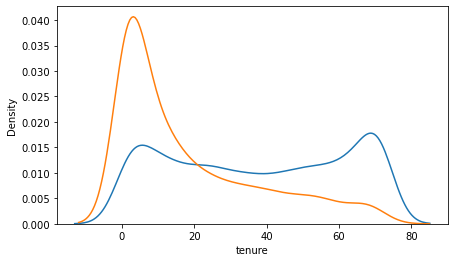

In [110]:
plt.figure(figsize=(7,4))
sns.distplot(churn_0['tenure'],hist=False,rug=False)
sns.distplot(churn_1['tenure'],hist=False,rug=False)
plt.show()

### Checking how many customers came back ad brought online security considering churn 

In [111]:
#onlinesecurity 
df2[(df2.Churn==1)&(df2.OnlineSecurity==0)].count()

gender              1461
SeniorCitizen       1461
Partner             1461
Dependents          1461
tenure              1461
PhoneService        1461
MultipleLines       1461
InternetService     1461
OnlineSecurity      1461
OnlineBackup        1461
DeviceProtection    1461
TechSupport         1461
StreamingTV         1461
StreamingMovies     1461
Contract            1461
PaperlessBilling    1461
PaymentMethod       1461
MonthlyCharges      1461
TotalCharges        1461
Churn               1461
dtype: int64

In [112]:
df2[(df2.Churn==1)&(df2.OnlineSecurity==1)].count()

gender              113
SeniorCitizen       113
Partner             113
Dependents          113
tenure              113
PhoneService        113
MultipleLines       113
InternetService     113
OnlineSecurity      113
OnlineBackup        113
DeviceProtection    113
TechSupport         113
StreamingTV         113
StreamingMovies     113
Contract            113
PaperlessBilling    113
PaymentMethod       113
MonthlyCharges      113
TotalCharges        113
Churn               113
dtype: int64

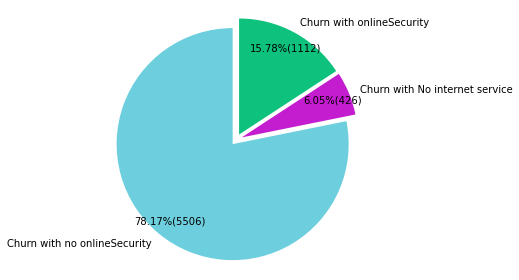

In [113]:
# Pie chart
labels = ['Churn with no onlineSecurity', 'Churn with No internet service', 'Churn with onlineSecurity']
sizes = [1461,113,295]
colors = ['#6dcfde','#c31dcf','#0ec27d']
plt.pie(sizes, colors = colors, labels=labels, autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)), startangle=90, pctdistance=0.85, explode = explode)
fig = plt.gcf()
plt.axis('equal')  
plt.tight_layout()
plt.show()

### We can observe from the above pie chart that 
1. 78.17% Churn belongs to no online security 
2. 15.78% churn with online security 
3. 6.05% churn with no online security 

In [114]:
#onlinebackup
df2[(df2.Churn==1)&(df2.OnlineBackup==0)].count()


gender              1233
SeniorCitizen       1233
Partner             1233
Dependents          1233
tenure              1233
PhoneService        1233
MultipleLines       1233
InternetService     1233
OnlineSecurity      1233
OnlineBackup        1233
DeviceProtection    1233
TechSupport         1233
StreamingTV         1233
StreamingMovies     1233
Contract            1233
PaperlessBilling    1233
PaymentMethod       1233
MonthlyCharges      1233
TotalCharges        1233
Churn               1233
dtype: int64

In [115]:
df2[(df2.Churn==1)&(df2.OnlineBackup==1)].count()

gender              113
SeniorCitizen       113
Partner             113
Dependents          113
tenure              113
PhoneService        113
MultipleLines       113
InternetService     113
OnlineSecurity      113
OnlineBackup        113
DeviceProtection    113
TechSupport         113
StreamingTV         113
StreamingMovies     113
Contract            113
PaperlessBilling    113
PaymentMethod       113
MonthlyCharges      113
TotalCharges        113
Churn               113
dtype: int64

In [116]:
df2[(df2.Churn==1)&(df2.OnlineBackup==2)].count()

gender              523
SeniorCitizen       523
Partner             523
Dependents          523
tenure              523
PhoneService        523
MultipleLines       523
InternetService     523
OnlineSecurity      523
OnlineBackup        523
DeviceProtection    523
TechSupport         523
StreamingTV         523
StreamingMovies     523
Contract            523
PaperlessBilling    523
PaymentMethod       523
MonthlyCharges      523
TotalCharges        523
Churn               523
dtype: int64

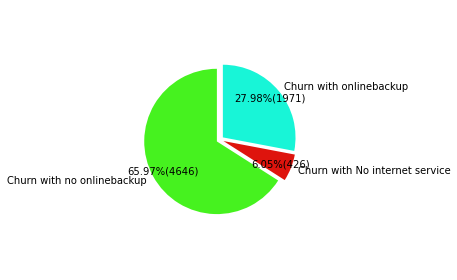

In [117]:
# Pie chart
labels = ['Churn with no onlinebackup', 'Churn with No internet service', 'Churn with onlinebackup']
sizes = [1233,113,523]
colors = ['#46f21f','#de140d','#18f5d7']
plt.pie(sizes, colors = colors, labels=labels, autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)), startangle=90, pctdistance=0.85, explode = explode)
fig = plt.gcf()
plt.axis('equal')  
plt.tight_layout()
plt.show()

### We can observe from the above pie chart that 
1. 35.97% Churn belongs to no online backup
2. 27.98% churn with online backup
3. 6.05% churn with no internet service

In [118]:
#deviceprotection
df2[(df2.Churn==1)&(df2.DeviceProtection==0)].count()

gender              1211
SeniorCitizen       1211
Partner             1211
Dependents          1211
tenure              1211
PhoneService        1211
MultipleLines       1211
InternetService     1211
OnlineSecurity      1211
OnlineBackup        1211
DeviceProtection    1211
TechSupport         1211
StreamingTV         1211
StreamingMovies     1211
Contract            1211
PaperlessBilling    1211
PaymentMethod       1211
MonthlyCharges      1211
TotalCharges        1211
Churn               1211
dtype: int64

In [119]:
df2[(df2.Churn==1)&(df2.DeviceProtection==1)].count()

gender              113
SeniorCitizen       113
Partner             113
Dependents          113
tenure              113
PhoneService        113
MultipleLines       113
InternetService     113
OnlineSecurity      113
OnlineBackup        113
DeviceProtection    113
TechSupport         113
StreamingTV         113
StreamingMovies     113
Contract            113
PaperlessBilling    113
PaymentMethod       113
MonthlyCharges      113
TotalCharges        113
Churn               113
dtype: int64

In [120]:
df2[(df2.Churn==1)&(df2.DeviceProtection==2)].count()

gender              545
SeniorCitizen       545
Partner             545
Dependents          545
tenure              545
PhoneService        545
MultipleLines       545
InternetService     545
OnlineSecurity      545
OnlineBackup        545
DeviceProtection    545
TechSupport         545
StreamingTV         545
StreamingMovies     545
Contract            545
PaperlessBilling    545
PaymentMethod       545
MonthlyCharges      545
TotalCharges        545
Churn               545
dtype: int64

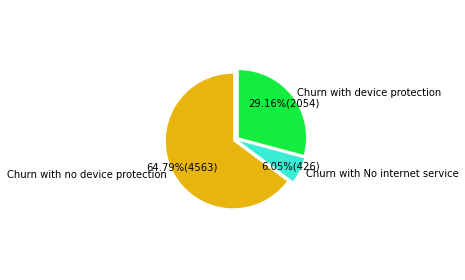

In [121]:
# Pie chart
labels = ['Churn with no device protection', 'Churn with No internet service', 'Churn with device protection']
sizes = [1211,113,545]
colors = ['#e8b50e','#39edd5','#13ed3f']
plt.pie(sizes, colors = colors, labels=labels, autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)), startangle=90, pctdistance=0.85, explode = explode)
fig = plt.gcf()
plt.axis('equal')  
plt.tight_layout()
plt.show()

### We can observe from the above pie chart that 
1. 64.79% Churn belongs to no online backup
2. 29.16% churn with online backup
3. 6.05% churn with no internet service

In [122]:
###techsupport

df2[(df2.Churn==1)&(df2.TechSupport==0)].count()


gender              1446
SeniorCitizen       1446
Partner             1446
Dependents          1446
tenure              1446
PhoneService        1446
MultipleLines       1446
InternetService     1446
OnlineSecurity      1446
OnlineBackup        1446
DeviceProtection    1446
TechSupport         1446
StreamingTV         1446
StreamingMovies     1446
Contract            1446
PaperlessBilling    1446
PaymentMethod       1446
MonthlyCharges      1446
TotalCharges        1446
Churn               1446
dtype: int64

In [123]:
df2[(df2.Churn==1)&(df2.TechSupport==1)].count()

gender              113
SeniorCitizen       113
Partner             113
Dependents          113
tenure              113
PhoneService        113
MultipleLines       113
InternetService     113
OnlineSecurity      113
OnlineBackup        113
DeviceProtection    113
TechSupport         113
StreamingTV         113
StreamingMovies     113
Contract            113
PaperlessBilling    113
PaymentMethod       113
MonthlyCharges      113
TotalCharges        113
Churn               113
dtype: int64

In [124]:
df2[(df2.Churn==1)&(df2.TechSupport==2)].count()

gender              310
SeniorCitizen       310
Partner             310
Dependents          310
tenure              310
PhoneService        310
MultipleLines       310
InternetService     310
OnlineSecurity      310
OnlineBackup        310
DeviceProtection    310
TechSupport         310
StreamingTV         310
StreamingMovies     310
Contract            310
PaperlessBilling    310
PaymentMethod       310
MonthlyCharges      310
TotalCharges        310
Churn               310
dtype: int64

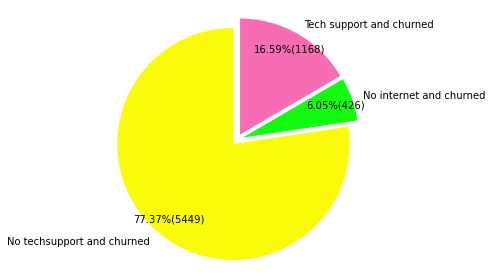

In [125]:
# Pie chart
labels = ['No techsupport and churned', 'No internet and churned', 'Tech support and churned']
sizes = [1446,113,310]
colors = ['#fafa0a','#15fa11','#f76db4']
plt.pie(sizes, colors = colors, labels=labels, autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)), startangle=90, pctdistance=0.85, explode = explode)
fig = plt.gcf()
plt.axis('equal')  
plt.tight_layout()
plt.show()

### We can observe from the above pie chart that 
1. 77.37% Churn with no device protection
2. 16.59% Churn with device protection 
3. 6.05% Churn with no internet service

In [126]:
#contract 

df2[(df2.Churn==1)&(df2.Contract==0)].count()

gender              1655
SeniorCitizen       1655
Partner             1655
Dependents          1655
tenure              1655
PhoneService        1655
MultipleLines       1655
InternetService     1655
OnlineSecurity      1655
OnlineBackup        1655
DeviceProtection    1655
TechSupport         1655
StreamingTV         1655
StreamingMovies     1655
Contract            1655
PaperlessBilling    1655
PaymentMethod       1655
MonthlyCharges      1655
TotalCharges        1655
Churn               1655
dtype: int64

In [127]:
df2[(df2.Churn==1)&(df2.Contract==1)].count()

gender              166
SeniorCitizen       166
Partner             166
Dependents          166
tenure              166
PhoneService        166
MultipleLines       166
InternetService     166
OnlineSecurity      166
OnlineBackup        166
DeviceProtection    166
TechSupport         166
StreamingTV         166
StreamingMovies     166
Contract            166
PaperlessBilling    166
PaymentMethod       166
MonthlyCharges      166
TotalCharges        166
Churn               166
dtype: int64

In [128]:
df2[(df2.Churn==1)&(df2.Contract==2)].count()

gender              48
SeniorCitizen       48
Partner             48
Dependents          48
tenure              48
PhoneService        48
MultipleLines       48
InternetService     48
OnlineSecurity      48
OnlineBackup        48
DeviceProtection    48
TechSupport         48
StreamingTV         48
StreamingMovies     48
Contract            48
PaperlessBilling    48
PaymentMethod       48
MonthlyCharges      48
TotalCharges        48
Churn               48
dtype: int64

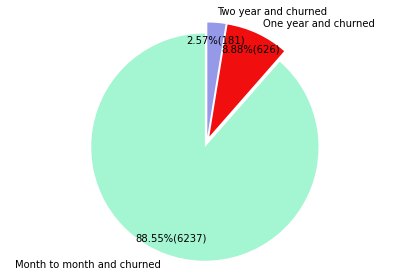

In [129]:
# Pie chart
labels = ['Month to month and churned', 'One year and churned', 'Two year and churned']
sizes = [1655,166,48]
colors = ['#a4f5d2','#f00e0e','#9599e8']
plt.pie(sizes, colors = colors, labels=labels, autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)), startangle=90, pctdistance=0.85, explode = explode)
fig = plt.gcf()
plt.axis('equal')  
plt.tight_layout()
plt.show()

### We can observe from the above pie chart that 
1. 88.55% Churn with no device protection
2. 8.88% Churn with device protection 
3. 2.57% Churn with no internet service

In [130]:
#paperlessbilling

df2[(df2.Churn==1)&(df2.PaperlessBilling==0)].count()

gender              469
SeniorCitizen       469
Partner             469
Dependents          469
tenure              469
PhoneService        469
MultipleLines       469
InternetService     469
OnlineSecurity      469
OnlineBackup        469
DeviceProtection    469
TechSupport         469
StreamingTV         469
StreamingMovies     469
Contract            469
PaperlessBilling    469
PaymentMethod       469
MonthlyCharges      469
TotalCharges        469
Churn               469
dtype: int64

In [131]:
df2[(df2.Churn==1)&(df2.PaperlessBilling==1)].count()

gender              1400
SeniorCitizen       1400
Partner             1400
Dependents          1400
tenure              1400
PhoneService        1400
MultipleLines       1400
InternetService     1400
OnlineSecurity      1400
OnlineBackup        1400
DeviceProtection    1400
TechSupport         1400
StreamingTV         1400
StreamingMovies     1400
Contract            1400
PaperlessBilling    1400
PaymentMethod       1400
MonthlyCharges      1400
TotalCharges        1400
Churn               1400
dtype: int64

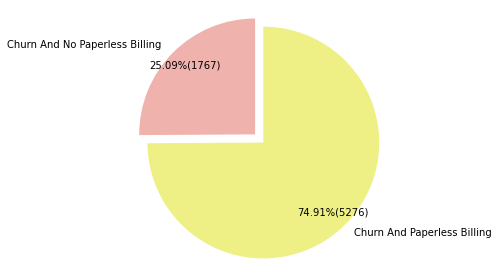

In [132]:
# Pie chart
labels = ['Churn And No Paperless Billing ', 'Churn And Paperless Billing']
sizes = [469,1400]
explode = (0.05,0.05)
colors = ['#f0b2ad','#eef086']
plt.pie(sizes, colors = colors, labels=labels, autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)), startangle=90, pctdistance=0.85, explode = explode)
fig = plt.gcf()
plt.axis('equal')  
plt.tight_layout()
plt.show()

### We can observe from the above pie chart that 
1. 74.91% Churn and paperless billing 
2. 8.88% Churn and no paperless billing 

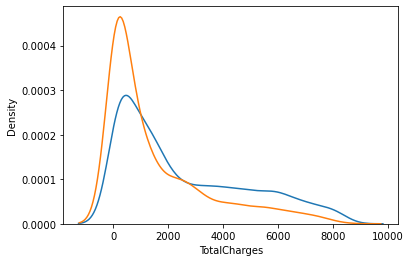

In [133]:
#total charges
sns.distplot(churn_0['TotalCharges'],hist=False,rug=False)
sns.distplot(churn_1['TotalCharges'],hist=False,rug=False)
plt.show()

Group by contract and tenure

In [134]:
contract=df2.groupby('Contract')
month_contract=contract.get_group(0)
year_contract=contract.get_group(1)
two_year_contract=contract.get_group(2)

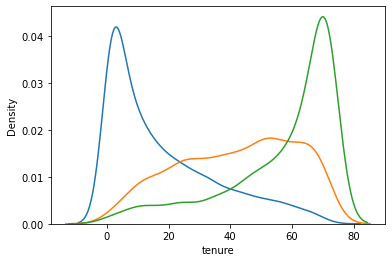

In [135]:
sns.distplot(month_contract['tenure'],hist=False,rug=False)
sns.distplot(year_contract['tenure'],hist=False,rug=False)
sns.distplot(two_year_contract['tenure'],hist=False,rug=False)
plt.show()

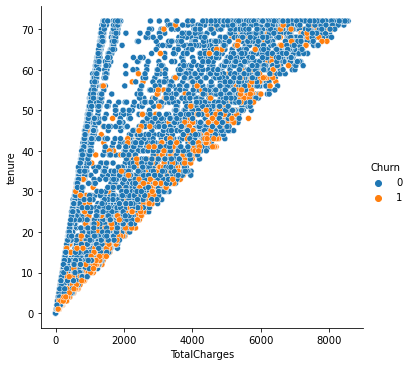

In [136]:
#Total charges and tenure churn 
sns.relplot(x='TotalCharges',y='tenure',data=df2,hue='Churn')

Grouping by online backup and tenure 

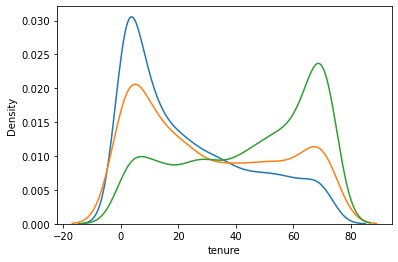

In [137]:
OnlineBackup=df2.groupby('OnlineBackup')
OnlineBackup_0=OnlineBackup.get_group(0)
OnlineBackup_1=OnlineBackup.get_group(1)
OnlineBackup_2=OnlineBackup.get_group(2)
sns.distplot(OnlineBackup_0['tenure'],hist=False,rug=False)
sns.distplot(OnlineBackup_1['tenure'],hist=False,rug=False)
sns.distplot(OnlineBackup_2['tenure'],hist=False,rug=False)
plt.show()

Grouping by Multiple lines and total charges 

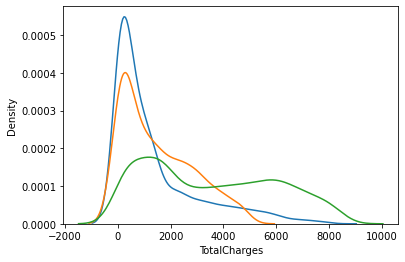

In [138]:
MultipleLines=df2.groupby('MultipleLines')
MultipleLines_0=MultipleLines.get_group(0)
MultipleLines_1=MultipleLines.get_group(1)
MultipleLines_2=MultipleLines.get_group(2)
sns.distplot(MultipleLines_0['TotalCharges'],hist=False,rug=False)
sns.distplot(MultipleLines_1['TotalCharges'],hist=False,rug=False)
sns.distplot(MultipleLines_2['TotalCharges'],hist=False,rug=False)
plt.show()

Grouping by Internet service and Monthly charges 

In [146]:
#online security monthly
df2[(df2.Contract==0)&(df2.OnlineSecurity==0)].count()


gender              2631
SeniorCitizen       2631
Partner             2631
Dependents          2631
tenure              2631
PhoneService        2631
MultipleLines       2631
InternetService     2631
OnlineSecurity      2631
OnlineBackup        2631
DeviceProtection    2631
TechSupport         2631
StreamingTV         2631
StreamingMovies     2631
Contract            2631
PaperlessBilling    2631
PaymentMethod       2631
MonthlyCharges      2631
TotalCharges        2631
Churn               2631
dtype: int64

In [147]:
df2[(df2.Contract==0)&(df2.OnlineSecurity==1)].count()

gender              524
SeniorCitizen       524
Partner             524
Dependents          524
tenure              524
PhoneService        524
MultipleLines       524
InternetService     524
OnlineSecurity      524
OnlineBackup        524
DeviceProtection    524
TechSupport         524
StreamingTV         524
StreamingMovies     524
Contract            524
PaperlessBilling    524
PaymentMethod       524
MonthlyCharges      524
TotalCharges        524
Churn               524
dtype: int64

In [148]:
df2[(df2.Contract==0)&(df2.OnlineSecurity==2)].count()

gender              720
SeniorCitizen       720
Partner             720
Dependents          720
tenure              720
PhoneService        720
MultipleLines       720
InternetService     720
OnlineSecurity      720
OnlineBackup        720
DeviceProtection    720
TechSupport         720
StreamingTV         720
StreamingMovies     720
Contract            720
PaperlessBilling    720
PaymentMethod       720
MonthlyCharges      720
TotalCharges        720
Churn               720
dtype: int64

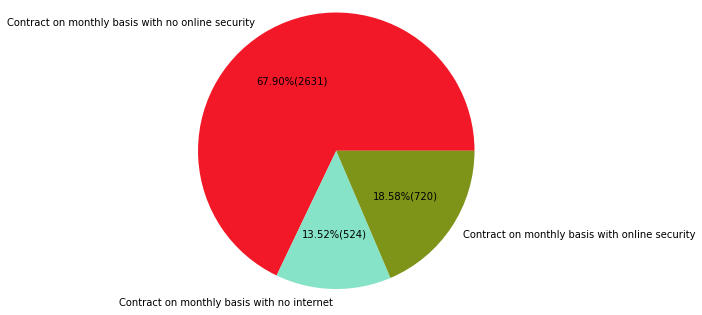

In [149]:
# Pie chart
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs = ['Contract on monthly basis with no online security', 'Contract on monthly basis with no internet','Contract on monthly basis with online security']
value = [2631,524,720]
colors = ['#f21827','#86e3c7','#7d9419']
ax.pie(value,labels=langs,colors=colors,radius=1.2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.show()

### We can observe from the above pie chart that 
1. 67.90% Montly with no online security 

2. 18.58% Monthly with no internet

3. 13.52% Monthly with no internet 

In [150]:
#online security yearly 

df2[(df2.Contract==1)&(df2.OnlineSecurity==0)].count()

gender              557
SeniorCitizen       557
Partner             557
Dependents          557
tenure              557
PhoneService        557
MultipleLines       557
InternetService     557
OnlineSecurity      557
OnlineBackup        557
DeviceProtection    557
TechSupport         557
StreamingTV         557
StreamingMovies     557
Contract            557
PaperlessBilling    557
PaymentMethod       557
MonthlyCharges      557
TotalCharges        557
Churn               557
dtype: int64

In [151]:
df2[(df2.Contract==1)&(df2.OnlineSecurity==1)].count()

gender              364
SeniorCitizen       364
Partner             364
Dependents          364
tenure              364
PhoneService        364
MultipleLines       364
InternetService     364
OnlineSecurity      364
OnlineBackup        364
DeviceProtection    364
TechSupport         364
StreamingTV         364
StreamingMovies     364
Contract            364
PaperlessBilling    364
PaymentMethod       364
MonthlyCharges      364
TotalCharges        364
Churn               364
dtype: int64

In [152]:
df2[(df2.Contract==1)&(df2.OnlineSecurity==2)].count()

gender              552
SeniorCitizen       552
Partner             552
Dependents          552
tenure              552
PhoneService        552
MultipleLines       552
InternetService     552
OnlineSecurity      552
OnlineBackup        552
DeviceProtection    552
TechSupport         552
StreamingTV         552
StreamingMovies     552
Contract            552
PaperlessBilling    552
PaymentMethod       552
MonthlyCharges      552
TotalCharges        552
Churn               552
dtype: int64

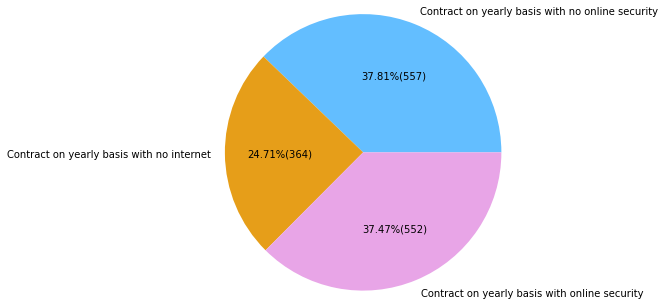

In [153]:
# Pie chart
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs = ['Contract on yearly basis with no online security', 'Contract on yearly basis with no internet','Contract on yearly basis with online security']
value = [557,364,552]
colors = ['#63beff','#e69e19','#e8a5e7']
ax.pie(value,labels=langs,colors=colors,radius=1.2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.show()

### We can observe from the above pie chart that 

1. 37.81% yeary with no online security 

2. 24.71% yearly with no internet

3. 37.47% yearly with online security 

In [154]:
#online security 2 years 

df2[(df2.Contract==2)&(df2.OnlineSecurity==0)].count()

gender              310
SeniorCitizen       310
Partner             310
Dependents          310
tenure              310
PhoneService        310
MultipleLines       310
InternetService     310
OnlineSecurity      310
OnlineBackup        310
DeviceProtection    310
TechSupport         310
StreamingTV         310
StreamingMovies     310
Contract            310
PaperlessBilling    310
PaymentMethod       310
MonthlyCharges      310
TotalCharges        310
Churn               310
dtype: int64

In [155]:
df2[(df2.Contract==2)&(df2.OnlineSecurity==1)].count()

gender              638
SeniorCitizen       638
Partner             638
Dependents          638
tenure              638
PhoneService        638
MultipleLines       638
InternetService     638
OnlineSecurity      638
OnlineBackup        638
DeviceProtection    638
TechSupport         638
StreamingTV         638
StreamingMovies     638
Contract            638
PaperlessBilling    638
PaymentMethod       638
MonthlyCharges      638
TotalCharges        638
Churn               638
dtype: int64

In [156]:
df2[(df2.Contract==2)&(df2.OnlineSecurity==2)].count()

gender              747
SeniorCitizen       747
Partner             747
Dependents          747
tenure              747
PhoneService        747
MultipleLines       747
InternetService     747
OnlineSecurity      747
OnlineBackup        747
DeviceProtection    747
TechSupport         747
StreamingTV         747
StreamingMovies     747
Contract            747
PaperlessBilling    747
PaymentMethod       747
MonthlyCharges      747
TotalCharges        747
Churn               747
dtype: int64

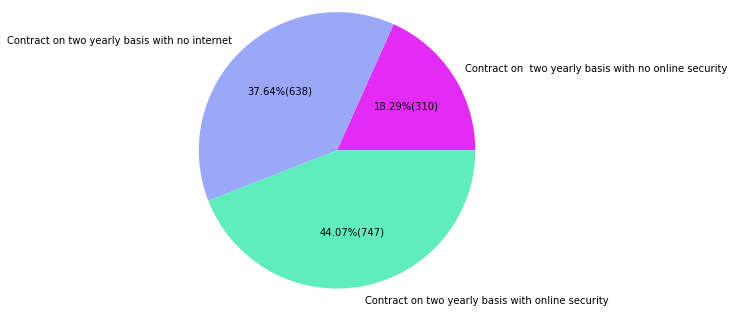

In [157]:
# Pie chart
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs = ['Contract on  two yearly basis with no online security', 'Contract on two yearly basis with no internet','Contract on two yearly basis with online security']
value = [310,638,747]
colors = ['#e42af5','#9ba8fa','#5fedbe']
ax.pie(value,labels=langs,colors=colors,radius=1.2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.show()

### We can observe from the above pie chart that 

1. 37.64% two yeary with no internet

2. 44.07% two yearly with online security

3. 18.29% two yearly with no online security 

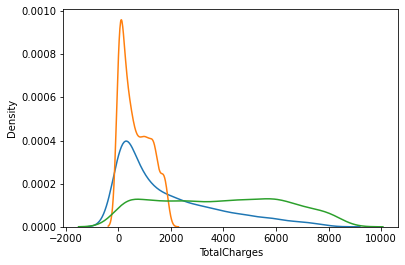

In [158]:
#online backup and total charges

OnlineBackup=df2.groupby('OnlineBackup')
OnlineBackup_0=OnlineBackup.get_group(0)
OnlineBackup_1=OnlineBackup.get_group(1)
OnlineBackup_2=OnlineBackup.get_group(2)
sns.distplot(OnlineBackup_0['TotalCharges'],hist=False,rug=False)
sns.distplot(OnlineBackup_1['TotalCharges'],hist=False,rug=False)
sns.distplot(OnlineBackup_2['TotalCharges'],hist=False,rug=False)
plt.show()

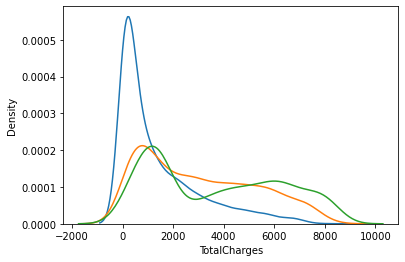

In [159]:
#contract and total charges

Contract=df2.groupby('Contract')
Contract_0=Contract.get_group(0)
Contract_1=Contract.get_group(1)
Contract_2=Contract.get_group(2)
sns.distplot(Contract_0['TotalCharges'],hist=False,rug=False)
sns.distplot(Contract_1['TotalCharges'],hist=False,rug=False)
sns.distplot(Contract_2['TotalCharges'],hist=False,rug=False)
plt.show()

# 6) Operations on dataset to prepare it for model building 

In [160]:
k=df2.applymap(np.isreal)

In [162]:
for col in k:
    print(col)
    print(k[col].value_counts())
    print('\n')

gender
True    7043
Name: gender, dtype: int64


SeniorCitizen
True    7043
Name: SeniorCitizen, dtype: int64


Partner
True    7043
Name: Partner, dtype: int64


Dependents
True    7043
Name: Dependents, dtype: int64


tenure
True    7043
Name: tenure, dtype: int64


PhoneService
True    7043
Name: PhoneService, dtype: int64


MultipleLines
True    7043
Name: MultipleLines, dtype: int64


InternetService
False    7043
Name: InternetService, dtype: int64


OnlineSecurity
True    7043
Name: OnlineSecurity, dtype: int64


OnlineBackup
True    7043
Name: OnlineBackup, dtype: int64


DeviceProtection
True    7043
Name: DeviceProtection, dtype: int64


TechSupport
True    7043
Name: TechSupport, dtype: int64


StreamingTV
True    7043
Name: StreamingTV, dtype: int64


StreamingMovies
True    7043
Name: StreamingMovies, dtype: int64


Contract
True    7043
Name: Contract, dtype: int64


PaperlessBilling
True    7043
Name: PaperlessBilling, dtype: int64


PaymentMethod
True    7043
Name: Paym

In [198]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
threshold=3
df3=df2[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df2.shape[0]-df3.shape[0])/df2.shape[0])

percentage of loss of data by zscore is : 0.09683373562402385


In [203]:
x=df3.drop('Churn',axis=1)
y=df3['Churn']
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=45)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Accuracy Score')
print(round((accuracy_score(y_test,pred)),3))
print('Classfication Report')
print(classification_report(y_test,pred))


Accuracy Score
0.788
Classfication Report
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1055
           1       0.64      0.56      0.60       409

    accuracy                           0.79      1464
   macro avg       0.74      0.72      0.73      1464
weighted avg       0.78      0.79      0.78      1464



Now that the outliers are removed we will split the variables and then remove the skewness of the data before we finally proceed towards model building 

In [204]:
x=df2.drop('Churn',axis=1)
y=df2['Churn']

In [205]:
x.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.960637
dtype: float64

In [207]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)
x_smote,y_smote=SM.fit_resample(x,y)

In [209]:
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.23,random_state=45)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Accuracy Score')
print(round((accuracy_score(y_test,pred)),3))
print('Classfication Report')
print(classification_report(y_test,pred))


Accuracy Score
0.797
Classfication Report
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1175
           1       0.79      0.82      0.80      1206

    accuracy                           0.80      2381
   macro avg       0.80      0.80      0.80      2381
weighted avg       0.80      0.80      0.80      2381



# 7) Model Building 

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

In [218]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=i)
    mod=lg
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy',maxAccu,'Random State',maxRS)

Best Accuracy 0.8103059581320451 Random State 124


In [211]:
lg=LogisticRegression()
gbc=GradientBoostingClassifier()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
svc=SVC()
abc=AdaBoostClassifier()


In [212]:
list_model=[lg,gbc,dtc,gnb,knc,rfc,svc,abc]

In [213]:
#Linear Regression
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='RdYlGn', square=True)
    plt.xlabel("predicted")
    plt.show()

In [214]:
maxacc=0
maxrn=0

for i in range(1,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy Score :',maxacc,'Random State :',maxrn)

Accuracy Score : 0.7382867960246096 Random State : 1


accuracy_score:- 0.718409843823947
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1527
           1       0.49      0.47      0.48       586

    accuracy                           0.72      2113
   macro avg       0.65      0.64      0.64      2113
weighted avg       0.71      0.72      0.72      2113



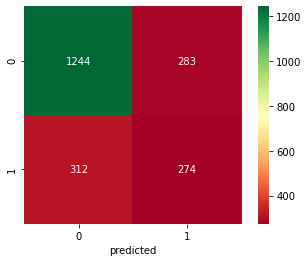

In [215]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=10)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
confusion_plot()

In [219]:
# Gradient Boosting Classifier 

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Oranges', square=True)
    plt.xlabel("predicted")
    plt.show()

In [220]:
maxacc=0
maxrn=0

for i in range(1,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    gbc.fit(x_train,y_train)
    pred=gbc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy Score :',maxacc,'Random State :',maxrn)

Accuracy Score : 0.8144817794604827 Random State : 3


accuracy_score:- 0.7889256980596309
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1682
           1       0.49      0.70      0.57       431

    accuracy                           0.79      2113
   macro avg       0.70      0.75      0.72      2113
weighted avg       0.83      0.79      0.80      2113



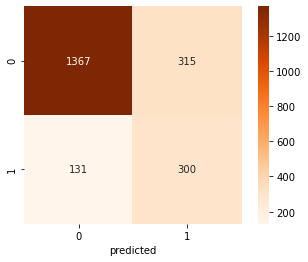

In [221]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=32)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
confusion_plot()

In [223]:
# Decision Tree Classifier 

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='viridis', square=True)
    plt.xlabel("predicted")
    plt.show()

In [224]:
maxacc=0
maxrn=0

for i in range(1,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy Score :',maxacc,'Random State :',maxrn)

Accuracy Score : 0.738760056791292 Random State : 1


accuracy_score:- 0.7283483199242783
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1518
           1       0.52      0.53      0.53       595

    accuracy                           0.73      2113
   macro avg       0.67      0.67      0.67      2113
weighted avg       0.73      0.73      0.73      2113



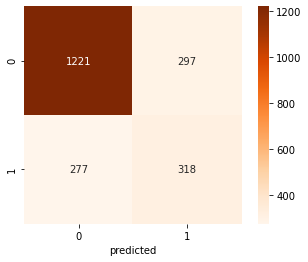

In [222]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=32)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
confusion_plot()

In [225]:
# Gaussian NB

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='coolwarm', square=True)
    plt.xlabel("predicted")
    plt.show()

In [226]:
maxacc=0
maxrn=0

for i in range(1,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    gnb.fit(x_train,y_train)
    pred=gnb.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.7652626597255088 Random state:- 5


accuracy_score:- 0.7482252721249408
              precision    recall  f1-score   support

           0       0.76      0.88      0.82      1356
           1       0.71      0.50      0.59       757

    accuracy                           0.75      2113
   macro avg       0.74      0.69      0.70      2113
weighted avg       0.74      0.75      0.74      2113



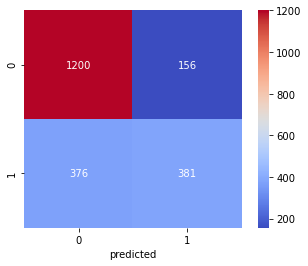

In [227]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=54)
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
confusion_plot()

In [228]:
#KNeighbours Classifer 

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='YlOrBr', square=True)
    plt.xlabel("predicted")
    plt.show()

In [229]:
maxacc=0
maxrn=0

for i in range(1,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy Score :',maxacc,'Random State :',maxrn)

Accuracy Score : 0.7884524372929484 Random State : 3


accuracy_score:- 0.7610033128253668
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1673
           1       0.44      0.58      0.50       440

    accuracy                           0.76      2113
   macro avg       0.66      0.69      0.67      2113
weighted avg       0.79      0.76      0.77      2113



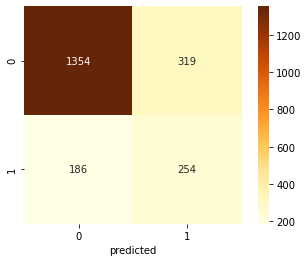

In [230]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=57)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
confusion_plot()


In [231]:
#Random Forest Classifer 

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Reds', square=True)
    plt.xlabel("predicted")
    plt.show()

In [232]:
maxacc=0
maxrn=0

for i in range(1,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy Score :',maxacc,'Random State :',maxrn)

Accuracy Score : 0.8017037387600567 Random State : 1


accuracy_score:- 0.7941315664931378
              precision    recall  f1-score   support

           0       0.90      0.83      0.87      1683
           1       0.50      0.66      0.56       430

    accuracy                           0.79      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.82      0.79      0.80      2113



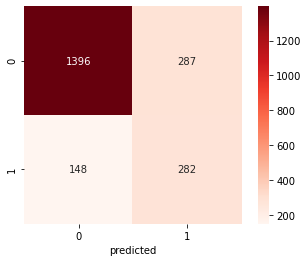

In [233]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=5)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()

In [234]:
#Support Vector Classifier 

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='viridis', square=True)
    plt.xlabel("predicted")
    plt.show()

In [235]:
maxacc=0
maxrn=0

for i in range(1,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy Score : ',maxacc,'Random State :',maxrn)

Accuracy Score :  0.7501183151916706 Random State : 1


accuracy_score:- 0.7264552768575485
              precision    recall  f1-score   support

           0       1.00      0.73      0.84      2113
           1       0.00      0.00      0.00         0

    accuracy                           0.73      2113
   macro avg       0.50      0.36      0.42      2113
weighted avg       1.00      0.73      0.84      2113



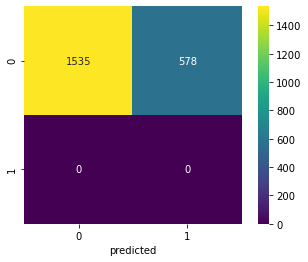

In [236]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=83)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
confusion_plot()


In [237]:
#Ada Boost Classifier 

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Greens', square=True)
    plt.xlabel("predicted")
    plt.show()


In [238]:
maxacc=0
maxrn=0

for i in range(1,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    abc.fit(x_train,y_train)
    pred=abc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy Score :',maxacc,'Random State :',maxrn)

Accuracy Score : 0.8149550402271651 Random State : 3


accuracy_score:- 0.8026502602934217
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1657
           1       0.53      0.69      0.60       456

    accuracy                           0.80      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.83      0.80      0.81      2113



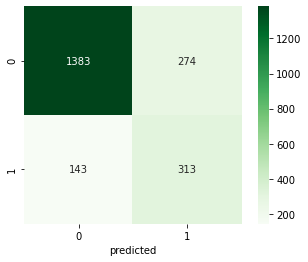

In [239]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=37)
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
confusion_plot()

# 8) Cross validation and Hyperparameter Tuning

In [241]:
list_model=[lg,gbc,dtc,gnb,knc,rfc,svc,abc]
for m in list_model:
    score=cross_val_score(m,x_over,y_over,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LogisticRegression() score is:
0.792


GradientBoostingClassifier() score is:
0.818


DecisionTreeClassifier() score is:
0.78


GaussianNB() score is:
0.774


KNeighborsClassifier() score is:
0.774


RandomForestClassifier() score is:
0.835


SVC() score is:
0.659


AdaBoostClassifier() score is:
0.807





<br><font face = "Muller Text" size = "4"> <b> The best model is Random Forest Classifier 

In [244]:
rf1=RandomForestClassifier(n_estimators=100,criterion='entropy',max_features='sqrt',bootstrap=True,oob_score=True,class_weight='balanced_subsample')
rf1.fit(x_train,y_train)
pred=rf1.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.788
classification report is
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1526
           1       0.66      0.49      0.56       587

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

confusion matrix is
[[1375  151]
 [ 298  289]]




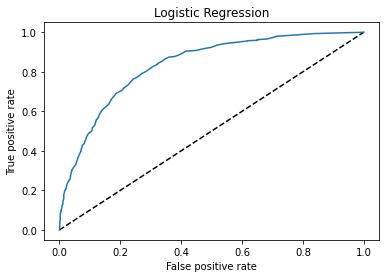

In [247]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=rf1.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()
